In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("C:/population_india_census2011.csv")
df.set_index("Sno", inplace=True)
df.head(10)

,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
Sno,,,,,,,
1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931
6,Tamil Nadu,72147030,37229590,34917440,"130,058 km2 (50,216 sq mi)","555/km2 (1,440/sq mi)",996
7,Rajasthan,68548437,51500352,17048085,"342,239 km2 (132,139 sq mi)",201/km2 (520/sq mi),928
8,Karnataka,61095297,37469335,23625962,"191,791 km2 (74,051 sq mi)",319/km2 (830/sq mi),973
9,Gujarat,60439692,34694609,25745083,"196,024 km2 (75,685 sq mi)",308/km2 (800/sq mi),919


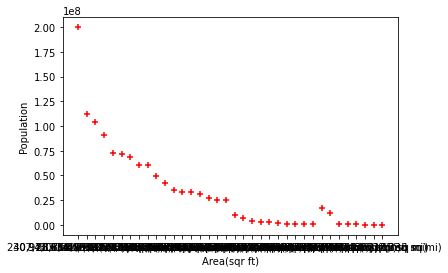

In [4]:
%matplotlib inline
plt.xlabel("Area(sqr ft)")
plt.ylabel("Population")
plt.scatter(df.Area,df.Population,color="red",marker="+")

In [5]:
df["State / Union Territory"][df.Population == df.Population.max()][df.Area == df.Area.max()]

Series([], Name: State / Union Territory, dtype: object)

In [6]:
ndf = df[["Population", "Urban population"]][:10]
ndf

,Population,Urban population
Sno,,
1,199812341,44495063
2,112374333,50818259
3,104099452,11758016
4,91276115,29093002
5,72626809,20069405
6,72147030,34917440
7,68548437,17048085
8,61095297,23625962
9,60439692,25745083


In [7]:
reg = linear_model.LinearRegression()
reg.fit(ndf[["Population"]], ndf["Urban population"])

LinearRegression()

In [8]:
pydict = {
    "area":[2600,3000,3200,3600,4000],
    "price":[550000,565000,610000,680000,725000]
}

In [9]:
ndf= pd.DataFrame(pydict)
ndf

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


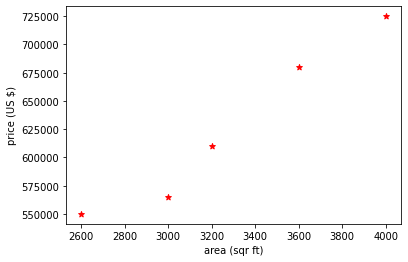

In [10]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel("price (US $)")
plt.scatter(ndf.area,ndf.price,color="red",marker="*")

In [11]:
reg = linear_model.LinearRegression()
reg.fit(ndf[["area"]], ndf.price)

LinearRegression()

In [12]:
reg.coef_

array([135.78767123])

In [13]:
reg.intercept_


180616.43835616432

In [14]:
reg.predict([[3300]])

array([628715.75342466])

In [16]:
135.78767123*3300+180616.43835616432


628715.7534151643

In [30]:
onlyarea={
    "area":[1000,1500,2300,3540,4120,4560,5490,3460,4750,2300,9000,8600,7100]
}

In [56]:
d= pd.DataFrame(onlyarea)
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [57]:
p = reg.predict(d)

In [58]:
d['prices'] = p

In [59]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [60]:
d.to_csv("prediction.csv", index=False)

In [61]:
nd = pd.read_csv("prediction.csv")

In [62]:
nd

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


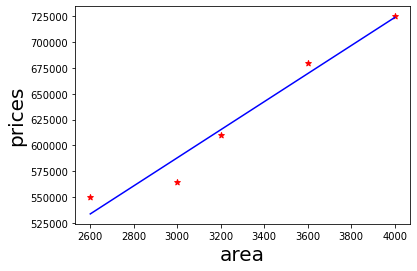

In [80]:
%matplotlib inline
plt.xlabel("area", fontsize=20)
plt.ylabel("prices", fontsize=20)
plt.scatter(ndf.area, ndf.price,color="red", marker="*")
plt.plot(ndf.area, reg.predict(ndf[['area']]),color="blue")

In [74]:
df = pd.read_csv("C:\learnML\canada_per_capita_income.csv")
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [75]:
pred = linear_model.LinearRegression()
pred.fit(df[['year']], df['per capita income (US$)'])

LinearRegression()

In [76]:
pred.predict([[2020]])

array([41288.69409442])

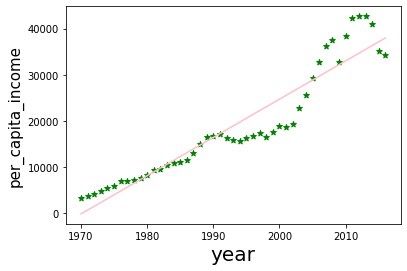

In [83]:
%matplotlib inline
plt.xlabel("year", fontsize=20)
plt.ylabel("per_capita_income", fontsize=15)
plt.scatter(df.year, df["per capita income (US$)"], color="green", marker="*")
plt.plot(df.year, pred.predict(df[["year"]]), color="pink")
